Anto Delin Xavier - 121287793

Athreya Sudarshan Srikanth -121124418

Pranav Shashidhara - 121292148

Swati Nair - 121232342

Vivek Vasisht Ediga - 121300720

**DATA CLEANING AND DATA PREPROCESSING**


(a) Importing the neccessary libraries and dataset

DB connection has been setup in AWS RDS:

Port: 5432

DB link:projects-database.cxgcu68ksihx.us-east-1.rds.amazonaws.com

Database type: Postgress SQL dadtabase.

The Db is linked to Tableau to display live changes in SQL RDS data. We will connect the RDS DB to this notebook.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../dataset/DATA602ProjectCleanedNew.csv')
print(df.head())

   Unnamed: 0  index  InvoiceNo StockCode  \
0           1      1     536365     71053   
1           2      2     536365    84406B   
2           3      3     536365    84029G   
3           5      5     536365     22752   
4           7      7     536366     22633   

                           Description  Quantity       InvoiceDate  UnitPrice  \
0                  WHITE METAL LANTERN         6  12-01-2010 08:26       3.39   
1       CREAM CUPID HEARTS COAT HANGER         8  12-01-2010 08:26       2.75   
2  KNITTED UNION FLAG HOT WATER BOTTLE         6  12-01-2010 08:26       3.39   
3         SET 7 BABUSHKA NESTING BOXES         2  12-01-2010 08:26       7.65   
4               HAND WARMER UNION JACK         6  12-01-2010 08:28       1.85   

   CustomerID         Country  
0     17850.0  United Kingdom  
1     17850.0  United Kingdom  
2     17850.0  United Kingdom  
3     17850.0  United Kingdom  
4     17850.0  United Kingdom  


In [7]:
df.tail()

,Unnamed: 0,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
281099,521720,521720,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,12-09-2011 12:50,4.15,12680.0,France
281100,521721,521721,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
281101,521723,521723,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
281102,521724,521724,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France
281103,521725,521725,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12-09-2011 12:50,4.95,12680.0,France


(b) Parse the data

In [8]:
df.dtypes

Unnamed: 0       int64
index            int64
InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [9]:
df['InvoiceNo'] = df['InvoiceNo'].astype(str).fillna('')  # Fill NaN with empty strings

# Extract the first character
first_chars = df['InvoiceNo'].str[0]

# Keep only the entries that are alphabetic
unique_letters = first_chars[first_chars.str.isalpha()].unique()
print(unique_letters)

[]


In [10]:
df['InvoiceNo'] = df['InvoiceNo'].str.replace('^C', '', regex=True)
df['InvoiceNo'] = df['InvoiceNo'].str.replace('^A', '', regex=True)

# Convert 'Quantity' and 'UnitPrice' to numeric, coercing errors to NaN
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

# Convert 'InvoiceNo' to integer safely
df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo'], errors='coerce')  # Convert with NaN handling
df['InvoiceNo'] = df['InvoiceNo'].dropna().astype(int)  # Drop NaNs and convert to int


In [11]:

df.dtypes

Unnamed: 0       int64
index            int64
InvoiceNo        int32
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

(c)Organize (e.g., set up a database or a pandas DataFrame)

In [12]:
print(df)

        Unnamed: 0   index  InvoiceNo StockCode  \
0                1       1     536365     71053   
1                2       2     536365    84406B   
2                3       3     536365    84029G   
3                5       5     536365     22752   
4                7       7     536366     22633   
...            ...     ...        ...       ...   
281099      521720  521720     581587     23256   
281100      521721  521721     581587     22613   
281101      521723  521723     581587     23254   
281102      521724  521724     581587     23255   
281103      521725  521725     581587     22138   

                                Description  Quantity       InvoiceDate  \
0                       WHITE METAL LANTERN         6  12-01-2010 08:26   
1            CREAM CUPID HEARTS COAT HANGER         8  12-01-2010 08:26   
2       KNITTED UNION FLAG HOT WATER BOTTLE         6  12-01-2010 08:26   
3              SET 7 BABUSHKA NESTING BOXES         2  12-01-2010 08:26   
4           

(d) Clean (address missing values, correct inconsistencies, and remove duplicates to ensure the dataset is ready for analysis.).

In [13]:
# Handling missing values
df.fillna({'CustomerID': 'Unknown', 'Description': 'Unknown'}, inplace=True)
df = df[(df['Quantity'] >= 0) & (df['UnitPrice'] >= 0.1)]
df

,Unnamed: 0,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,1,1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
1,2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
2,3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
3,5,5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12-01-2010 08:26,7.65,17850.0,United Kingdom
4,7,7,536366,22633,HAND WARMER UNION JACK,6,12-01-2010 08:28,1.85,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...,...
281099,521720,521720,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,12-09-2011 12:50,4.15,12680.0,France
281100,521721,521721,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
281101,521723,521723,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
281102,521724,521724,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France


In [14]:
# Removing special characters and values containing lowercase letters from Description (Description is said to contain product names in uppercase letters only)
df = df[~df['Description'].str.contains(r'[^a-zA-Z0-9\s]', regex=True)]
df = df[~df['Description'].str.contains(r'[^A-Z0-9\s]', regex=True)]
# Display updated dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281104 entries, 0 to 281103
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   281104 non-null  int64  
 1   index        281104 non-null  int64  
 2   InvoiceNo    281104 non-null  int32  
 3   StockCode    281104 non-null  object 
 4   Description  281104 non-null  object 
 5   Quantity     281104 non-null  int64  
 6   InvoiceDate  281104 non-null  object 
 7   UnitPrice    281104 non-null  float64
 8   CustomerID   281104 non-null  float64
 9   Country      281104 non-null  object 
dtypes: float64(2), int32(1), int64(3), object(4)
memory usage: 22.5+ MB


In [15]:
# Define a function to detect outliers using IQR
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Remove outliers from Quantity and UnitPrice columns
df_cleaned = remove_outliers(df, 'Quantity')
df_cleaned = remove_outliers(df_cleaned, 'UnitPrice')

# Display the cleaned dataset after outlier removal
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265228 entries, 0 to 281103
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   265228 non-null  int64  
 1   index        265228 non-null  int64  
 2   InvoiceNo    265228 non-null  int32  
 3   StockCode    265228 non-null  object 
 4   Description  265228 non-null  object 
 5   Quantity     265228 non-null  int64  
 6   InvoiceDate  265228 non-null  object 
 7   UnitPrice    265228 non-null  float64
 8   CustomerID   265228 non-null  float64
 9   Country      265228 non-null  object 
dtypes: float64(2), int32(1), int64(3), object(4)
memory usage: 21.2+ MB


In [16]:
df_cleaned

,Unnamed: 0,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,1,1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
1,2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
2,3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,7,7,536366,22633,HAND WARMER UNION JACK,6,12-01-2010 08:28,1.85,17850.0,United Kingdom
5,8,8,536366,22632,HAND WARMER RED POLKA DOT,6,12-01-2010 08:28,1.85,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...,...
281099,521720,521720,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,12-09-2011 12:50,4.15,12680.0,France
281100,521721,521721,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
281101,521723,521723,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
281102,521724,521724,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France


In [17]:
#Dropping Unknown values from CustomerID column
df_cleaned = df_cleaned[df_cleaned['CustomerID'] != "Unknown"]
print(df_cleaned)

        Unnamed: 0   index  InvoiceNo StockCode  \
0                1       1     536365     71053   
1                2       2     536365    84406B   
2                3       3     536365    84029G   
4                7       7     536366     22633   
5                8       8     536366     22632   
...            ...     ...        ...       ...   
281099      521720  521720     581587     23256   
281100      521721  521721     581587     22613   
281101      521723  521723     581587     23254   
281102      521724  521724     581587     23255   
281103      521725  521725     581587     22138   

                                Description  Quantity       InvoiceDate  \
0                       WHITE METAL LANTERN         6  12-01-2010 08:26   
1            CREAM CUPID HEARTS COAT HANGER         8  12-01-2010 08:26   
2       KNITTED UNION FLAG HOT WATER BOTTLE         6  12-01-2010 08:26   
4                    HAND WARMER UNION JACK         6  12-01-2010 08:28   
5           

In [18]:
df_cleaned.to_csv("DATA602ProjectCleanedNew.csv")

**Basic Data Exploration and Summary Statistics**





In [19]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 281104 entries, 0 to 281103
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   281104 non-null  int64  
 1   index        281104 non-null  int64  
 2   InvoiceNo    281104 non-null  int32  
 3   StockCode    281104 non-null  object 
 4   Description  281104 non-null  object 
 5   Quantity     281104 non-null  int64  
 6   InvoiceDate  281104 non-null  object 
 7   UnitPrice    281104 non-null  float64
 8   CustomerID   281104 non-null  float64
 9   Country      281104 non-null  object 
dtypes: float64(2), int32(1), int64(3), object(4)
memory usage: 22.5+ MB
None
Unnamed: 0     0
index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


Summary statistics

In [20]:
# Removing duplicates (if any)
df.drop_duplicates(inplace=True)

In [21]:
print(df.describe())
print(df.describe(include=['O']))

          Unnamed: 0          index      InvoiceNo       Quantity  \
count  281104.000000  281104.000000  281104.000000  281104.000000   
mean   270417.465774  270417.465774  560837.831891       5.608792   
std    147100.082629  147100.082629   13138.266015       4.608165   
min         1.000000       1.000000  536365.000000       1.000000   
25%    144817.750000  144817.750000  549387.000000       2.000000   
50%    277621.500000  277621.500000  562166.000000       4.000000   
75%    396791.250000  396791.250000  572309.000000      10.000000   
max    521725.000000  521725.000000  581587.000000      23.000000   

           UnitPrice     CustomerID  
count  281104.000000  281104.000000  
mean        2.664358   15438.043834  
std         2.038989    1655.061674  
min         0.100000   12413.000000  
25%         1.250000   14096.000000  
50%         1.950000   15379.000000  
75%         3.750000   16904.000000  
max         8.500000   18287.000000  
       StockCode              Descri

Histogram for numerical columns and Box Plot for numerical columns


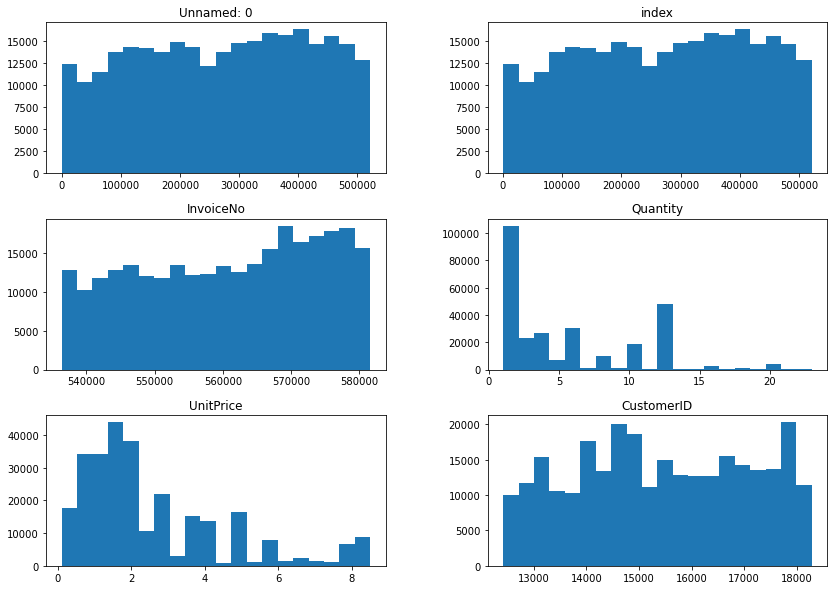

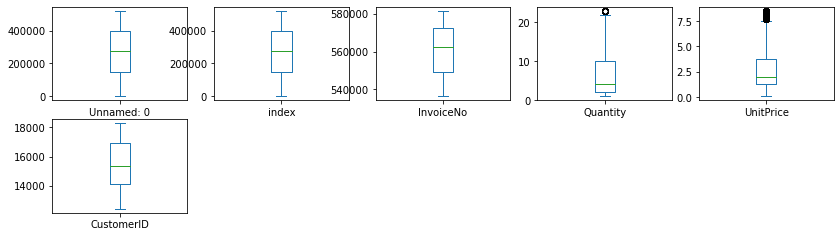

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
# Histogram for numerical columns
df.hist(bins=20, figsize=(14, 10), grid=False)
plt.show()
# Box plot for numerical columns
df.plot(kind='box', subplots=True, layout=(5, 5), figsize=(14, 10), grid=False)
plt.show()

Bar graph to visualize most transactions by countries

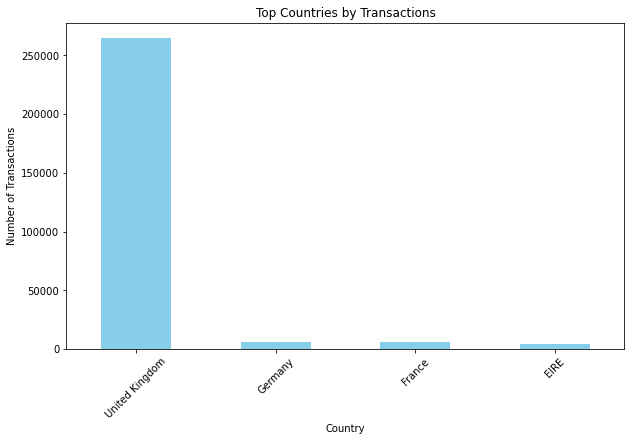

In [23]:
plt.figure(figsize=(10, 6))
top_countries = df['Country'].value_counts().head(10)
top_countries.plot(kind='bar', color='skyblue')  # Specify color for consistency
plt.title('Top Countries by Transactions')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

Getting descriptions for these products and obtaining total count.

In [24]:
top_products = df['StockCode'].value_counts().head(10).reset_index()
top_products.columns = ['StockCode', 'Count']

# Get the descriptions for these products
top_product_details = df[df['StockCode'].isin(top_products['StockCode'])][['StockCode', 'Description']].drop_duplicates()

# Merge to get the counts along with descriptions
top_product_details = pd.merge(top_product_details, top_products, on='StockCode')

# Print the results
print(top_product_details)

   StockCode                        Description  Count
0      20725            LUNCH BAG RED RETROSPOT   1149
1      84879      ASSORTED COLOUR BIRD ORNAMENT   1001
2      22382         LUNCH BAG SPACEBOY DESIGN     937
3      22383            LUNCH BAG SUKI  DESIGN     997
4      22383             LUNCH BAG SUKI DESIGN     997
5     85099B            JUMBO BAG RED RETROSPOT   1283
6      47566                      PARTY BUNTING   1221
7      22720  SET OF 3 CAKE TINS PANTRY DESIGN    1029
8      23298                     SPOTTY BUNTING    934
9      23209          LUNCH BAG DOILEY PATTERN     926
10     23209           LUNCH BAG VINTAGE DOILY     926
11     23209          LUNCH BAG VINTAGE DOILEY     926
12     23203          JUMBO BAG DOILEY PATTERNS    963
13     23203          JUMBO BAG VINTAGE DOILEY     963
14     23203           JUMBO BAG VINTAGE DOILY     963


Top 10 customers by overall spendings

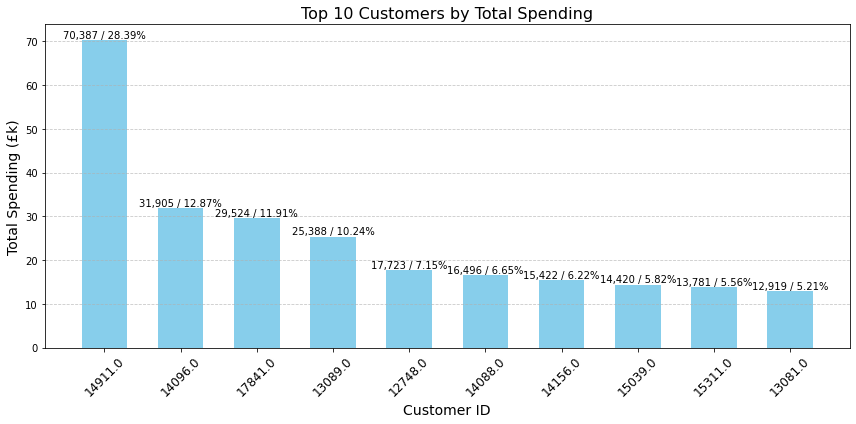

In [25]:
df['Total_Sales'] = df['Quantity'] * df['UnitPrice']

if 'CustomerID' in df.columns and 'Total_Sales' in df.columns:
    # Calculate total sales per customer
    customer_spending = df.groupby('CustomerID')['Total_Sales'].sum().reset_index()
    top_10_customers = customer_spending.sort_values(by='Total_Sales', ascending=False).head(10)

    # Calculate total spending and percentage contribution
    total_spending = top_10_customers['Total_Sales'].sum()
    top_10_customers['Percentage'] = (top_10_customers['Total_Sales'] / total_spending) * 100

    # Create the bar plot
    plt.figure(figsize=(12, 6))
    bars = plt.bar(top_10_customers['CustomerID'].astype(str), top_10_customers['Total_Sales'] / 1000, color='skyblue', width=0.6)
    plt.title('Top 10 Customers by Total Spending', fontsize=16)
    plt.xlabel('Customer ID', fontsize=14)
    plt.ylabel('Total Spending (£k)', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Annotate bars with total spending and percentage
    for bar, percentage in zip(bars, top_10_customers['Percentage']):
        total_value = bar.get_height() * 1000  # Original total price for correct labeling
        rounded_value = round(total_value)  # Round to nearest integer
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{rounded_value:,} / {percentage:.2f}%',
                 ha='center', va='bottom', color='black', fontsize=10)

    plt.tight_layout()
    plt.show()
else:
    print("One or more required columns are missing from the DataFrame.")

Customers with the highest sales percentage for each month

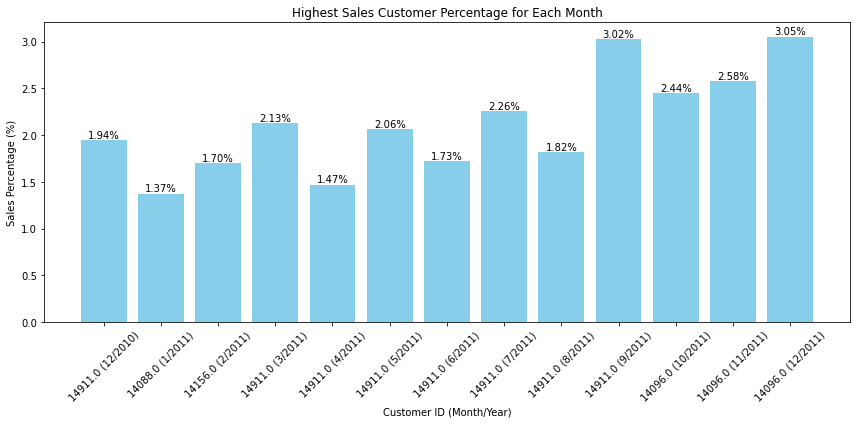

In [26]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Extract Year and Month
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Calculate monthly sales by CustomerID
monthly_sales = df.groupby(['Year', 'Month', 'CustomerID'])['Total_Sales'].sum().reset_index()

# Calculate total monthly sales
total_monthly_sales = monthly_sales.groupby(['Year', 'Month'])['Total_Sales'].transform('sum')

# Calculate sales percentage
monthly_sales['SalesPercentage'] = (monthly_sales['Total_Sales'] / total_monthly_sales) * 100

# Get the customer with the highest sales percentage for each month
highest_sales_customers = monthly_sales.loc[monthly_sales.groupby(['Year', 'Month'])['SalesPercentage'].idxmax()]

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(
    highest_sales_customers['CustomerID'].astype(str) + ' (' + highest_sales_customers['Month'].astype(str) + '/' + highest_sales_customers['Year'].astype(str) + ')',
    highest_sales_customers['SalesPercentage'],
    color='skyblue'
)

plt.title('Highest Sales Customer Percentage for Each Month')
plt.xlabel('Customer ID (Month/Year)')
plt.ylabel('Sales Percentage (%)')

# Annotate the bars with the percentage values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom', color='black')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top Selling Products by Quantity


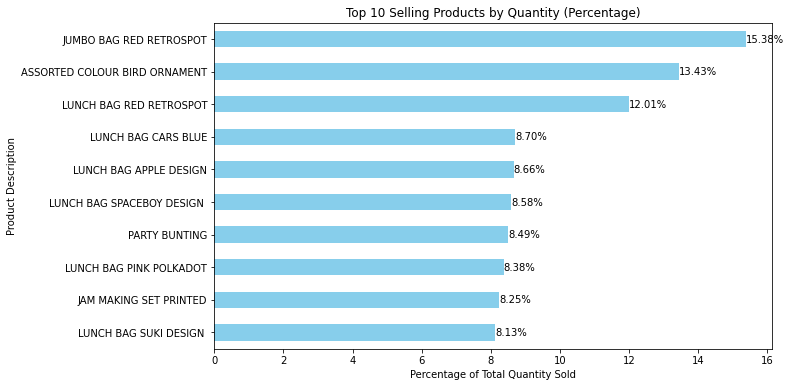

In [27]:

top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

top_products_percentage = (top_products / top_products.sum()) * 100

plt.figure(figsize=(10,6))
bars = top_products_percentage.plot(kind='barh', color='skyblue')
plt.title('Top 10 Selling Products by Quantity (Percentage)')
plt.xlabel('Percentage of Total Quantity Sold')
plt.ylabel('Product Description')
plt.gca().invert_yaxis()

for index, value in enumerate(top_products_percentage):
    plt.text(value, index, f'{value:.2f}%', va='center', ha='left', color='black')

plt.show()


Data Visualization for Sales over Time

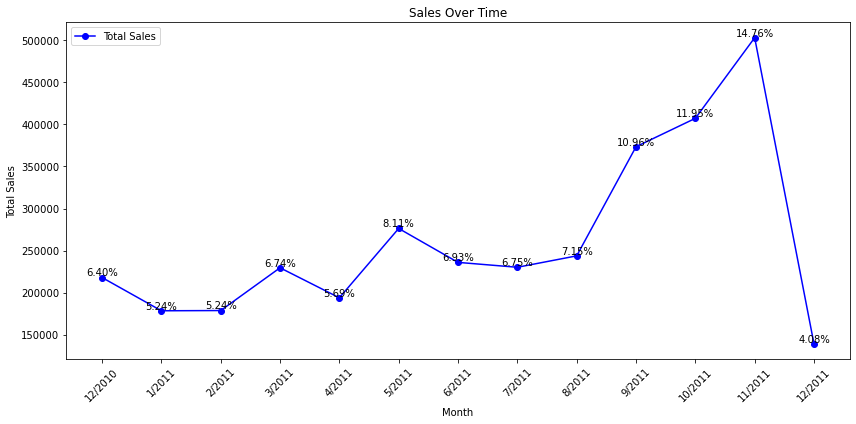

            TotalSales  SalesPercentage
Year Month                             
2010 12      217980.71         6.397026
2011 1       178437.71         5.236567
     2       178720.67         5.244871
     3       229551.46         6.736590
     4       193893.41         5.690142
     5       276299.32         8.108488
     6       235987.81         6.925476
     7       230165.79         6.754618
     8       243730.26         7.152691
     9       373461.71        10.959888
     10      407237.53        11.951099
     11      503102.18        14.764415
     12      138963.60         4.078130


In [28]:

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

monthly_sales = df.groupby(['Year', 'Month'])['Total_Sales'].sum()
total_sales_all_time = df['Total_Sales'].sum()
monthly_sales_percentage = (monthly_sales / total_sales_all_time) * 100

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='b', label='Total Sales')
plt.title('Sales Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.xticks(ticks=range(len(monthly_sales)), labels=[f'{month}/{year}' for year, month in monthly_sales.index], rotation=45)

for i, (total, percentage) in enumerate(zip(monthly_sales, monthly_sales_percentage)):
    plt.text(i, total, f'{percentage:.2f}%', ha='center', va='bottom', color='black')

plt.legend()
plt.tight_layout()
plt.show()

monthly_sales_summary = pd.DataFrame({
    'TotalSales': monthly_sales,
    'SalesPercentage': monthly_sales_percentage
})

print(monthly_sales_summary)


Countries of top 10 spenders

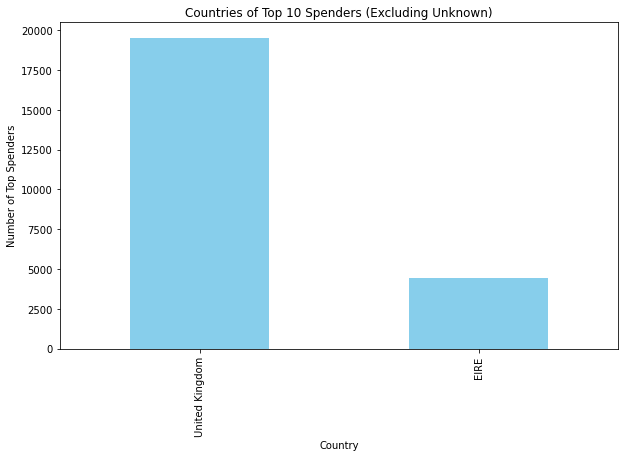

Index(['Unnamed: 0', 'index', 'InvoiceNo', 'StockCode', 'Description',
       'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country',
       'Total_Sales', 'Year', 'Month'],
      dtype='object')

In [29]:
# Group by country and sum total sales for each country
country_total_sales = df.groupby('Country')['Total_Sales'].sum()
sorted_country_sales = country_total_sales.sort_values(ascending=False)
top_10_countries = sorted_country_sales.head(10)


df_without_unknown = df[df['CustomerID'] != 'Unknown']
customer_spending = df_without_unknown.groupby('CustomerID')['Total_Sales'].sum()
sorted_customer_spending = customer_spending.sort_values(ascending=False)

top_10_customers = sorted_customer_spending.head(10)
top_10_customer_countries = df_without_unknown[df_without_unknown['CustomerID'].isin(top_10_customers.index)]['Country']
top_customer_country_counts = top_10_customer_countries.value_counts()

plt.figure(figsize=(10, 6))
top_customer_country_counts.plot(kind='bar', color='skyblue')
plt.title('Countries of Top 10 Spenders (Excluding Unknown)')
plt.xlabel('Country')
plt.ylabel('Number of Top Spenders')
plt.xticks(rotation=90)
plt.show()
df.columns

Correlation Matrix

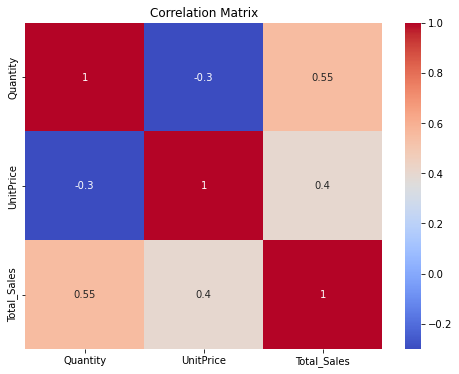

In [30]:
#Correlation matrix between Quantity, UnitPrice and Total Sales
correlation_matrix = df[['Quantity', 'UnitPrice', 'Total_Sales']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Boxplot for Quantity and Unitprice

c:\Users\Swati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Swati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


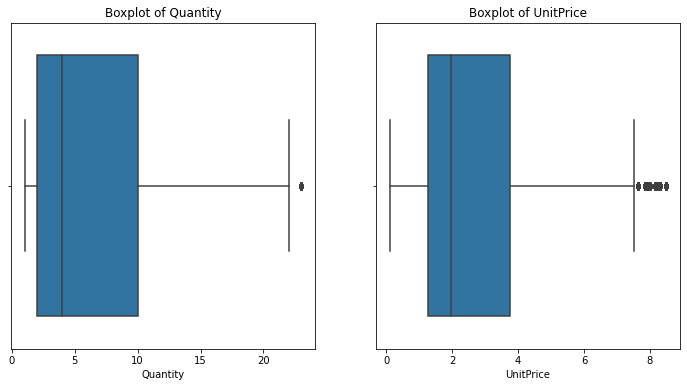

In [31]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(df['Quantity'])
plt.title('Boxplot of Quantity')

plt.subplot(1,2,2)
sns.boxplot(df['UnitPrice'])
plt.title('Boxplot of UnitPrice')

plt.show()

Customer Frequency Purchases

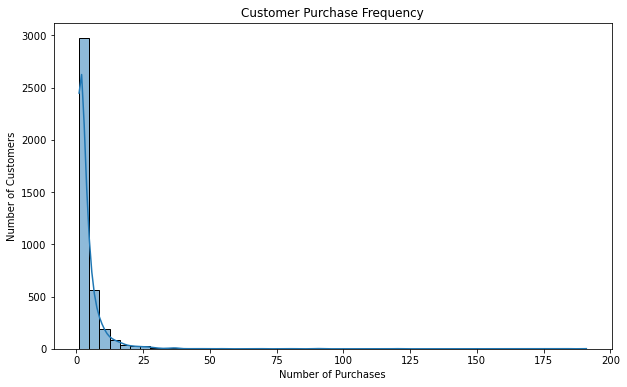

CustomerID
12413.0     3
12426.0     1
12427.0     3
12437.0    18
12441.0     1
           ..
18280.0     1
18281.0     1
18282.0     2
18283.0    16
18287.0     2
Name: InvoiceNo, Length: 3929, dtype: int64

In [32]:
# outliers need to be handled for Quantity for Unit Price it is not an issue. Minimal outliers seem to be present they should be handled.
# ensuring unkown is not put in this
purchase_frequency = df[df['CustomerID']!='Unknown'].groupby('CustomerID')['InvoiceNo'].nunique()

plt.figure(figsize=(10,6))
sns.histplot(purchase_frequency, bins=50,kde=True)
plt.title('Customer Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

purchase_frequency

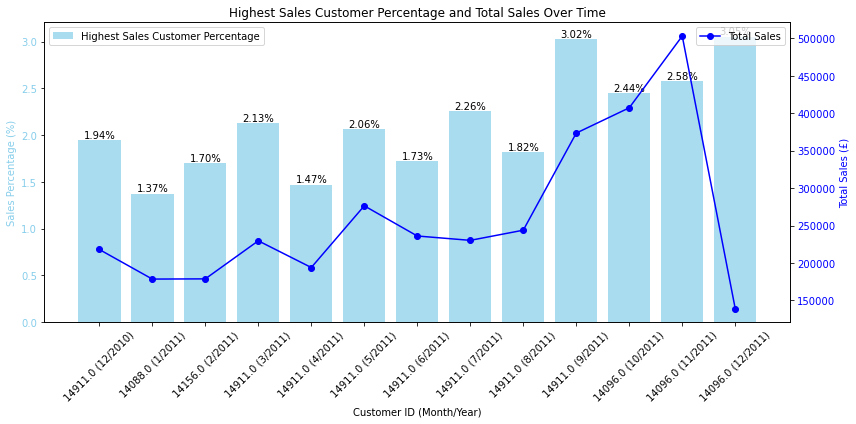

In [33]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

monthly_sales = df.groupby(['Year', 'Month', 'CustomerID'])['Total_Sales'].sum().reset_index()
total_monthly_sales = monthly_sales.groupby(['Year', 'Month'])['Total_Sales'].transform('sum')
monthly_sales['SalesPercentage'] = (monthly_sales['Total_Sales'] / total_monthly_sales) * 100

highest_sales_customers = monthly_sales.loc[monthly_sales.groupby(['Year', 'Month'])['SalesPercentage'].idxmax()]

fig, ax1 = plt.subplots(figsize=(12, 6))

bars = ax1.bar(highest_sales_customers['CustomerID'].astype(str) + ' (' + highest_sales_customers['Month'].astype(str) + '/' + highest_sales_customers['Year'].astype(str) + ')',
                highest_sales_customers['SalesPercentage'], color='skyblue', alpha=0.7)

ax1.set_title('Highest Sales Customer Percentage and Total Sales Over Time')
ax1.set_xlabel('Customer ID (Month/Year)')
ax1.set_ylabel('Sales Percentage (%)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

total_sales = df.groupby(['Year', 'Month'])['Total_Sales'].sum()
ax2 = ax1.twinx()
total_sales.plot(kind='line', marker='o', color='b', label='Total Sales', ax=ax2)

ax2.set_ylabel('Total Sales (£)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom', color='black')

ax1.set_xticklabels(highest_sales_customers['CustomerID'].astype(str) + ' (' + highest_sales_customers['Month'].astype(str) + '/' + highest_sales_customers['Year'].astype(str) + ')', rotation=45)
ax1.legend(['Highest Sales Customer Percentage'], loc='upper left')
ax2.legend(['Total Sales'], loc='upper right')

plt.tight_layout()
plt.show()


Top 10 Products by Quantity sold in November and December 2011.

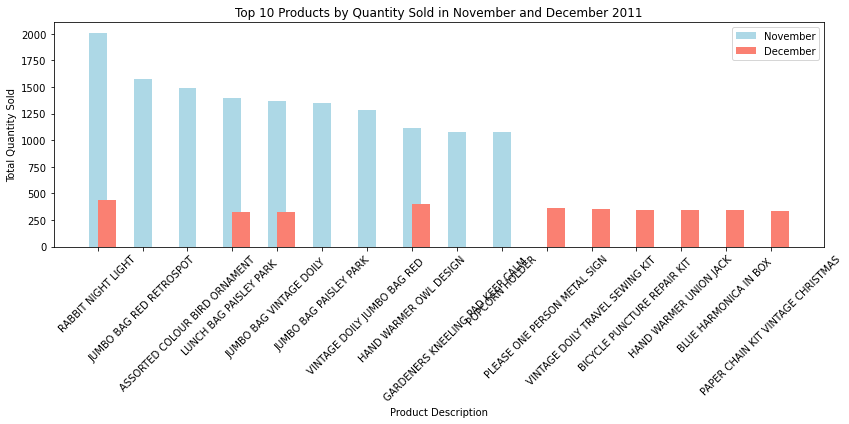

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

nov_sales = df[(df['InvoiceDate'].dt.year == 2011) & (df['InvoiceDate'].dt.month == 11)]
dec_sales = df[(df['InvoiceDate'].dt.year == 2011) & (df['InvoiceDate'].dt.month == 12)]

nov_product_sales = nov_sales.groupby('Description')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(10)
dec_product_sales = dec_sales.groupby('Description')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(10)

top_products = pd.merge(nov_product_sales, dec_product_sales, on='Description', how='outer', suffixes=('_Nov', '_Dec')).fillna(0)

plt.figure(figsize=(12, 6))
width = 0.4

plt.bar(top_products['Description'].astype(str), top_products['Quantity_Nov'], width=width, label='November', align='center', color='lightblue')
plt.bar(top_products['Description'].astype(str), top_products['Quantity_Dec'], width=width, label='December', align='edge', color='salmon')

plt.title('Top 10 Products by Quantity Sold in November and December 2011')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


**Summary**

1. There are no suspicious outliers and no null values in the dataset

2. Only one one month's (December) data is availabe for the year 2010 (Have to be carefully while doing any year related analysis)

3. 85.65% sales coming from UK

4. The highest sales come from the Customer 14911 with 28.39% followed by the Customer 14096 with 12.87%

5. The top two products with highest sales are PARTY BUNTING and JUMBO BAG RED RETROSPOT with 16% , 12% respectively.


6. The top two products with highest quantity sales are JUMBO BAG RED RETROSPOT and ASSORTED COLOUR BIRD ORNAMENT with 15% , 13% respectively.

7. 14911 topped highest sales in 8/13 months and the last three months with 14096, but with highest sales share of just under 3% - shows the diversity in Customers

8. There was a fluctualting growth from 12/2010 to 8/2011 and has seen a tremendous gowth from there before witnessing a significant dip in 12/2011 from 14.57 to 4 percentage


9. There was cut in sales of  almsot all the product in Dec 2011 ( with highest cuts in 14911 and 14096)


#Test 1: Correlation Analysis Between Unit Prices of Frequently Bought Items

This test aims to determine whether there is a positive correlation between the unit prices of items that are frequently bought together. The goal is to uncover any trends in customer behavior, such as whether high-priced items are more likely to be purchased with other high-priced items.


**Null Hypothesis (H₀):**
There is no correlation between the unit prices of items that are frequently bought together (Pearson correlation coefficient = 0).

**Alternative Hypothesis (Ha):**
There is a positive correlation between the unit prices of items that are frequently bought together (Pearson correlation coefficient > 0).

**Test Working**

This test will find if there is a positive relationship in the items that are bought together in regard to their prices. That would be interesting to find how higher-priced items are commonly purchased with other high-priced items, which would uncover some customer buying habits.

It does this by finding item pairs that show up together in one transaction and then calculates the Pearson correlation coefficient between their unit prices. A positive coefficient closer to 1 will show a very strong relationship between these items' prices. The p-value shall be used for assessing the statistical significance, which, if below 0.05, would indicate that the correlation is significant, hence the high-priced items are bound to be bought together. If the p-value is ≥ 0.05, then the relationship between the prices is not considered significant.

Pearson Correlation Coefficient: 0.1157039282436545
Statistically significant positive correlation between prices of items bought together.


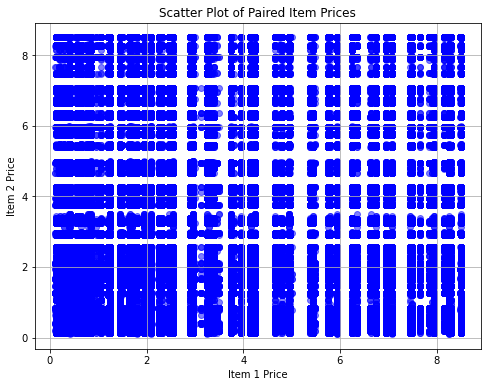

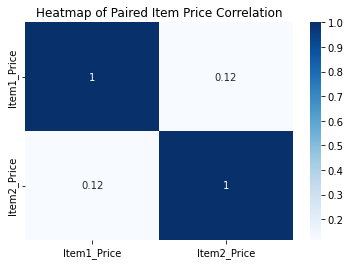

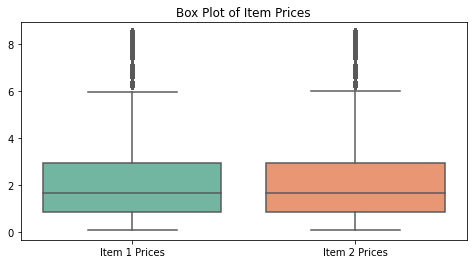

In [35]:
from itertools import combinations
from collections import defaultdict
import numpy as np
from scipy.stats import pearsonr
invoice_groups = df.groupby('InvoiceNo')['StockCode'].apply(list)

item_pairs = []
for items in invoice_groups:
    if len(items) > 1:
        item_pairs.extend(combinations(items, 2))

item_prices = df.set_index('StockCode')['UnitPrice'].to_dict()

pair_prices = defaultdict(list)
for item1, item2 in item_pairs:
    if item1 in item_prices and item2 in item_prices:
        pair_prices['Item1_Price'].append(item_prices[item1])
        pair_prices['Item2_Price'].append(item_prices[item2])

item1_prices = np.array(pair_prices['Item1_Price'])
item2_prices = np.array(pair_prices['Item2_Price'])

corr_coefficient, p_value = pearsonr(item1_prices, item2_prices)
print(f"Pearson Correlation Coefficient: {corr_coefficient}")

if p_value < 0.05:
    print("Statistically significant positive correlation between prices of items bought together.")
else:
    print("No significant correlation between prices of items bought together.")

plt.figure(figsize=(8, 6))
plt.scatter(item1_prices, item2_prices, alpha=0.5, color='blue')
plt.title('Scatter Plot of Paired Item Prices')
plt.xlabel('Item 1 Price')
plt.ylabel('Item 2 Price')
plt.grid(True)
plt.show()

corr_data = pd.DataFrame({'Item1_Price': item1_prices, 'Item2_Price': item2_prices})
plt.figure(figsize=(6, 4))
sns.heatmap(corr_data.corr(), annot=True, cmap='Blues')
plt.title('Heatmap of Paired Item Price Correlation')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(data=[item1_prices, item2_prices], palette='Set2')
plt.xticks([0, 1], ['Item 1 Prices', 'Item 2 Prices'])
plt.title('Box Plot of Item Prices')
plt.show()

**Conclusion**

The correlation analysis done shows a weak positive in the prices of items bought together, which can further imply that more highly priced items are likely to be bought together with other highly priced items; hence, there is a need to further study customer buying behaviour.

So we **reject** the null hypothesis

# Test 2 - Comparison of mean quantities purchased across different countries (ANOVA Test)

ANOVA test is employed to compare the average quantities purchased among different countries (e.g., France, Germany, EIRE, UK). By examining these groups, the test seeks to identify whether the purchasing behavior varies significantly across countries.
Hypothesis:

* Null Hypothesis(H0): There are significant differences in quantities purchased among countries.

    μFrance = μGermany = μEIRE = μUK

* Alternate Hypothesis(H1): There is a significant difference in the mean quantities purchased among at least one pair of countries.

Methodology:

* The methodology is as follows:
  * It calculates an F-statistic, which is the ratio of the variance between groups to the variance within groups.
  * A high F-statistic indicates that the means are significantly different from each other.
  * The test also computes a p-value to assess the statistical significance of the results.
  * A low p-value (typically less than 0.05) indicates strong evidence against the null hypothesis, suggesting that there are significant differences among the group means.



ANOVA results: F-statistic = 2536.468323116702, p-value = 0.0
Reject the null hypothesis: There are significant differences in quantities purchased among countries.


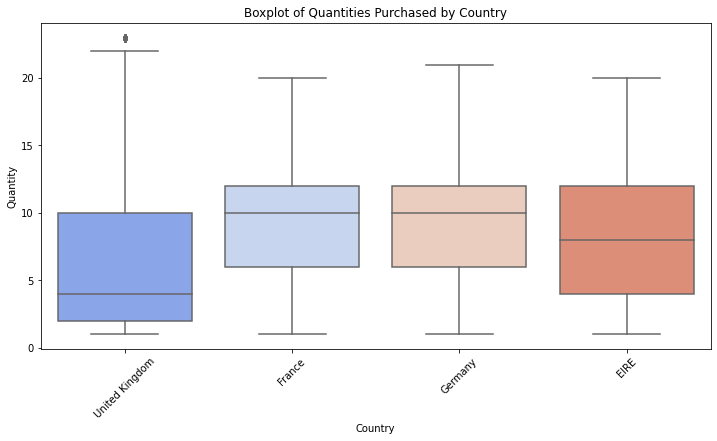

In [36]:
from scipy.stats import f_oneway

data = df[['Country', 'Quantity']]

grouped_data = data.groupby('Country')['Quantity'].apply(list)
f_stat, p_value = f_oneway(*grouped_data)
print(f"ANOVA results: F-statistic = {f_stat}, p-value = {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences in quantities purchased among countries.")
else:
    print("Fail to reject the null hypothesis: No significant differences in quantities purchased among countries.")

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Country', y='Quantity', palette='coolwarm')
plt.title('Boxplot of Quantities Purchased by Country')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

**Tukey's HSD Test** to provide specific pairwise comparison results, showing which countries have significant differences in purchasing quantities.

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1     group2     meandiff p-adj  lower   upper  reject
------------------------------------------------------------
   EIRE         France   0.4272 0.001   0.196  0.6584   True
   EIRE        Germany   0.7777 0.001  0.5508  1.0045   True
   EIRE United Kingdom  -2.7087 0.001 -2.8829 -2.5344   True
 France        Germany   0.3504 0.001  0.1378  0.5631   True
 France United Kingdom  -3.1359 0.001 -3.2911 -2.9806   True
Germany United Kingdom  -3.4863 0.001 -3.6351 -3.3376   True
------------------------------------------------------------


c:\Users\Swati\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


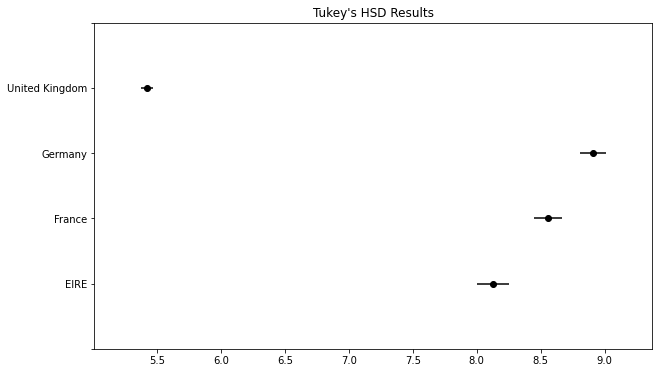

In [37]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(data['Quantity'], data['Country'], alpha=0.05)
print(tukey_results)

tukey_results.plot_simultaneous()
plt.title("Tukey's HSD Results")
plt.show()

**Conclusion**

The analysis reveals distinct purchasing behaviors among the countries studied: the **United Kingdom** has the **highest** quantities purchased, significantly more than EIRE, which ranks second. France and Germany show similar purchasing levels with no significant difference between them.

So we reject null hypothesis saying that there are no significant differences in quantities purchased among countries

# Test 3: Country association check with Bulk quantity(chi-squared test)

In this test we are trying to determine if customers from different countries are more likely to make bulk purchases compared to others. We are checking if there is a significant correlation between the countries compared with bulk purchases. We are classifying anything greater than a quantity of 10 as bulk purchase else it is categorized as a non-bulk purchase.

Hypothesis:

* Null Hypothesis(H0): Customers from different countries have similar bulk purchasing patterns.

* Alternate Hypothesis(H1): Customers from specific countries are more likely to purchase in bulk than others.

Methodology:

* The methodology is as follows:
  * A contingency table is created, which contains the frequency of categories ‘Bulk’ and ‘Non-Bulk’ for all the different countries.
  * Then a chi-squared test is performed to observe the frequencies of different bulk purchases in each country to the expected value if there was no relation between country and purchase behavior.
  * Then the p-value is calculated to check for assosiation. If the p-value is less than 0.05 then we reject the null hypothesis, indicating that some countries are more likely to make bulk purchases than others.
  * If the p-value is greater than 0.05 then we fail to reject the null hypothesis, indicating that there is no significant relationship between country and relationship.



In [38]:
import pandas as pd
import scipy.stats as stats


bulk_threshold = 15

df['BulkPurchase'] = df['Quantity'].apply(lambda x: 'Bulk' if x > bulk_threshold else 'Non-Bulk')

contingency_table = pd.crosstab(df['Country'], df['BulkPurchase'])

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table.sort_values(by = 'Bulk',ascending=False))
print("\nChi-squared Statistic:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
#print(expected)

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant association between Country and Bulk Purchase behavior.")
else:
    print("Fail to reject the null hypothesis. No significant association between Country and Bulk Purchase behavior.")


Contingency Table:
BulkPurchase    Bulk  Non-Bulk
Country                       
United Kingdom  7591    256845
Germany          402      5910
France           328      5457
EIRE             216      4355

Chi-squared Statistic: 443.2339468410355
P-value: 9.5324481819625e-96
Degrees of Freedom: 3
Expected Frequencies Table:
Reject the null hypothesis. There is a significant association between Country and Bulk Purchase behavior.


<Figure size 1080x576 with 0 Axes>

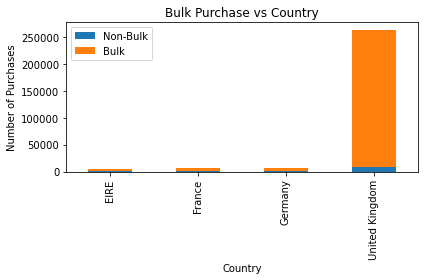

In [39]:
bulk_threshold = 15
df['BulkPurchase'] = df['Quantity'].apply(lambda x: 'Bulk' if x > bulk_threshold else 'Non-Bulk')

bulk_purchase_by_country = df.groupby(['Country', 'BulkPurchase'])['InvoiceNo'].count().unstack()

plt.figure(figsize=(15, 8))
bulk_purchase_by_country.plot(kind='bar', stacked=True)
plt.title('Bulk Purchase vs Country')
plt.xlabel('Country')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=90)
plt.legend(['Non-Bulk', 'Bulk'])
plt.tight_layout()
plt.show()

**Conclusion**

The analysis indicates a significant relationship between the customers from United Kingdom showed the highest bulk quantity purchasing features compared to other countries as shown by the chi-squared test and the contigency table which shows the frequency of the tables.

Since the p-value is very less than 0.05, we reject the null hypothesis saying that there is a significant assosiation between Country and Bulk purchase behaviour.

## Test 4: Mean Unit Prices Across Countries
In this analysis, we aim to determine whether there is a significant difference in the average unit price of items purchased across four countries: the United Kingdom, Germany, France, and EIRE. We will conduct a one-way Analysis of Variance (ANOVA) to compare the mean unit prices between these countries and test the following hypotheses:

Null Hypothesis (H₀):
There is no significant difference in the average unit prices of items purchased between countries. In other words, the mean unit prices for items purchased in the United Kingdom, Germany, France, and EIRE are equal. Mathematically:

μFrance = μGermany = μEIRE = μUK

Alternate Hypothesis (H₁):
At least one pair of countries has a significant difference in the average unit price of items purchased. This implies that the average unit price varies between at least two countries. Mathematically:

μFrance ≠ μGermany ≠ μEIRE ≠ μUK

Methodology:
To test this hypothesis, we will perform a one-way ANOVA, which compares the means across the groups (in this case, countries) to assess whether the observed differences are statistically significant. The ANOVA test is suitable for comparing means across multiple groups when there is one independent variable (in this case, the country) and one dependent variable (the unit price).

If the p-value resulting from the ANOVA test is less than the significance level (typically set at 0.05), we will reject the null hypothesis and conclude that there is a significant difference in the average unit prices between countries.
If the p-value is greater than or equal to the significance level, we fail to reject the null hypothesis, meaning there is no significant evidence to suggest that the average unit prices differ between countries.
This approach allows us to assess price sensitivity across regions and could provide insights into whether pricing strategies should be adjusted for different countries.



In [40]:
from scipy.stats import f_oneway

df_cleaned = df.dropna(subset=['UnitPrice', 'Country'])

# Group the data by Country and extract UnitPrice for each country
uk_prices = df_cleaned[df_cleaned['Country'] == 'United Kingdom']['UnitPrice']
germany_prices = df_cleaned[df_cleaned['Country'] == 'Germany']['UnitPrice']
france_prices = df_cleaned[df_cleaned['Country'] == 'France']['UnitPrice']
eire_prices = df_cleaned[df_cleaned['Country'] == 'EIRE']['UnitPrice']

# Perform the ANOVA test
anova_result = f_oneway(uk_prices, germany_prices, france_prices, eire_prices)
print("ANOVA test result: F-statistic =", anova_result.statistic, ", p-value =", anova_result.pvalue)

alpha = 0.05

if anova_result.pvalue < alpha:
    print("Reject the null hypothesis. There is a significant difference in unit prices between countries.")
else:
    print("Fail to reject the null hypothesis. No significant difference in unit prices between countries.")

ANOVA test result: F-statistic = 98.47390944117025 , p-value = 1.0521299834896724e-63
Reject the null hypothesis. There is a significant difference in unit prices between countries.


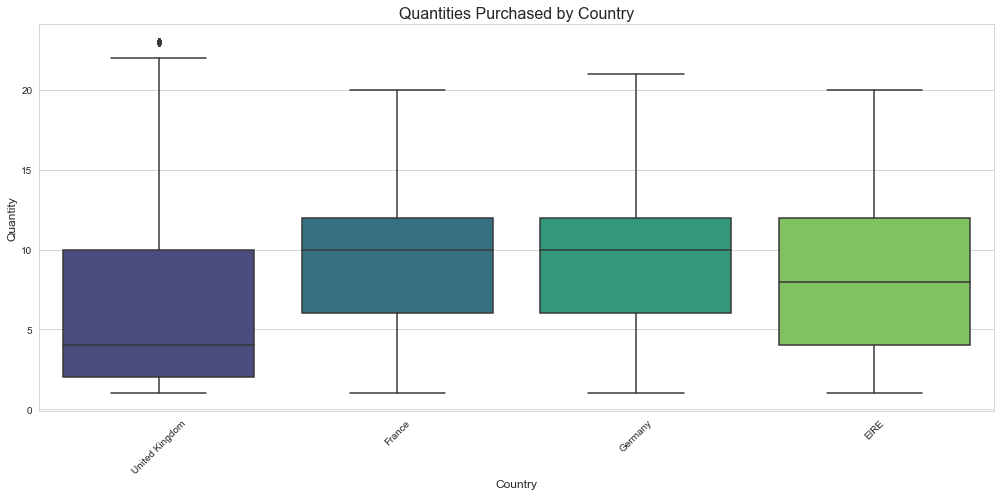

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")
sns.boxplot(data=df, x='Country', y='Quantity', palette='viridis')
plt.title('Quantities Purchased by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

Given that the p-value is significantly less than the conventional significance level of 0.05, we reject the null hypothesis. This indicates that there is strong statistical evidence to conclude that the average unit price of items purchased varies significantly between at least two of the countries in the dataset.

As a result, this finding suggests that customers in different countries exhibit different levels of price sensitivity.

## Test 5: Time of purchase association with Bulk purchase (chi-squared test)

To determine if there is an association between the time of purchase (weekly buying patterns) and whether customers are purchasing products in bulk (quantity greater than 100).

#Hypothesis:

1.**Null Hypothesis (H0)**: There is no significant association between time (week of the year) and bulk purchasing behavior.

2.**Alternative Hypothesis (H1)**: There is a significant association between time (week of the year) and bulk purchasing behavior.

##Methodology



1.**Bulk Classification**: Classify each transaction as 'Bulk' if an invoice contains more than 100 unique StockCodes, otherwise classify as 'Non-Bulk'.

2.**Time Period**: Group purchases by week to analyze buying patterns over time.

3.**Contingency Table**: Construct a contingency table that summarizes the frequency of 'Bulk' and 'Non-Bulk' purchases for each week.

4.**Chi-Squared Test**: A chi-squared test perfotmed to compare the observed frequency distribution of purchases against the expected distribution under the null hypothesis.

5.**Results**:  Evaluate the p-value; if it is less than 0.05, reject the null hypothesis, suggesting a significant relationship exists between the time of purchase and the likelihood of making bulk purchases.


In [42]:
def parse_date(date_str):
    for fmt in ("%d-%m-%Y %H:%M", "%m/%d/%Y %H:%M"):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    raise ValueError(f"Date format not recognized for {date_str}")


df['InvoiceDate'] = df['InvoiceDate'].apply(parse_date)

In [43]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt


df['Week'] = df['InvoiceDate'].dt.isocalendar().week.astype(str) + '-' + df['InvoiceDate'].dt.year.astype(str)


invoice_bulk_counts = df.groupby('InvoiceNo')['StockCode'].nunique()
df['BulkPurchase'] = df['InvoiceNo'].apply(lambda x: 'Bulk' if invoice_bulk_counts[x] > 100 else 'Non-Bulk')
contingency_table = pd.crosstab(df['Week'], df['BulkPurchase'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("Contingency Table:")
print(contingency_table)
print("\nChi-squared Statistic:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("\nExpected Frequencies Table:")
print(expected)

if p_value < 0.05:
    print("\nReject the null hypothesis. There is a significant association between time and Bulk Purchase behavior.")
else:
    print("\nFail to reject the null hypothesis. No significant association between time and Bulk Purchase behavior.")



Contingency Table:
BulkPurchase  Bulk  Non-Bulk
Week                        
1-2011         348      3140
10-2011        244      3529
11-2011        230      4037
12-2011        118      4406
13-2011        367      4168
14-2011          0      4470
15-2011          0      4500
16-2011        111      3300
17-2011          0      2532
18-2011        102      4208
19-2011          0      5216
2-2011           0      3129
20-2011        208      5230
21-2011        113      4010
22-2011        127      3239
23-2011        178      4846
24-2011          0      4664
25-2011        114      4118
26-2011          0      3473
27-2011          0      4153
28-2011        245      4153
29-2011        108      4657
3-2011           0      3121
30-2011        164      3934
31-2011        335      4039
32-2011        138      3499
33-2011        216      4352
34-2011        243      5022
35-2011          0      3504
36-2011        451      5306
37-2011        789      5512
38-2011        441      

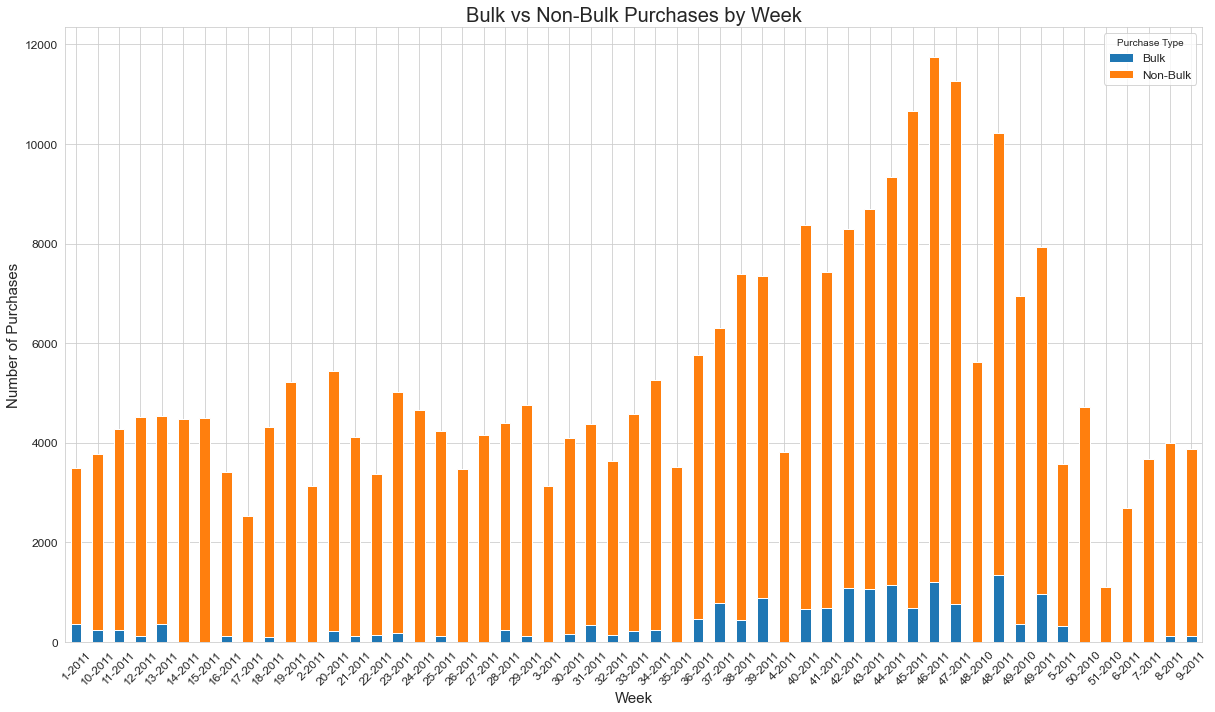

In [44]:

plt.figure(figsize=(17, 10))
contingency_table.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Bulk vs Non-Bulk Purchases by Week', fontsize=20)
plt.xlabel('Week', fontsize=15)
plt.ylabel('Number of Purchases', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Purchase Type', fontsize=12)
plt.tight_layout()
plt.show()


##Interpretation:
1. **Chi-squared Statistic**: A high Chi-squared statistic (9092.639) indicates a significant difference between the observed frequencies and the expected frequencies under the null hypothesis.

2. **P-value**: The p-value of 0.0 suggests that the probability of observing the data, assuming the null hypothesis is true, is extremely low. This indicates a very strong evidence against the null hypothesis.

3. **Degrees of Freedom**: This value (61) relates to the number of categories being compared and affects the critical value for determining statistical significance.

##Conclusion:
Given that the p-value is less than the typical alpha level of 0.05, we can reject the null hypothesis. This suggests that there is a significant association between the time of purchase (weeks) and the likelihood of making bulk purchases based on the unique product quantities (quantity >100). In other words, purchasing patterns vary significantly across different weeks, indicating that some weeks may have a higher tendency for bulk purchases than others.
